In [1]:
import pandas
import seaborn as sns
#Params
population_size=50
#Summarizes collected data, combining all indivs' from 1 generation.
def summarize_across_generations(dataframe):
    compressed_frame = dataframe.copy()
    compressed_frame.drop(compressed_frame.index, inplace=True)
    
    previous_generation = 0
    
    #Adding the first row
    compressed_frame.loc[previous_generation]=[0 for n in range(len(dataframe.columns))]
    population_counter = 0
    for indiv_count in range(len(dataframe)):
        #if indiv_count%population_size == 0:
        current_generation = dataframe["Generation"][indiv_count]
        if current_generation!=previous_generation:
            #Summarizing the previous row.
            compressed_frame.loc[previous_generation]/=population_counter
            #Adding a new row for the next generation.
            compressed_frame.loc[current_generation]=[0 for n in range(len(dataframe.columns))]
            previous_generation=current_generation
            population_counter = 0
        for column in dataframe:
            individual = dataframe[column][indiv_count]
            compressed_frame.iloc[-1, compressed_frame.columns.get_loc(column)]+=individual
        population_counter+=1
    
    compressed_frame.loc[previous_generation]/=population_counter
    return compressed_frame
        

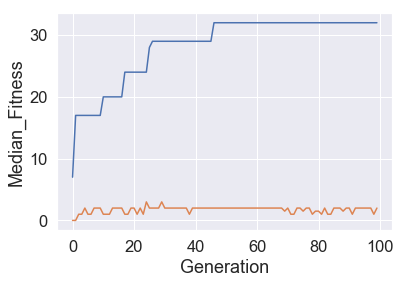

In [10]:
#Plotting Fitness: Converges VERY quickly.
fitness_file = "../aug2_evo_test_battery_capacity_25/fitness_summary.csv"
fitness_frame = pandas.read_csv(fitness_file, sep=" ")
sns.lineplot(x="Generation", y="Best_Fitness", data=fitness_frame)
sns.lineplot(x="Generation", y="Median_Fitness", data=fitness_frame)
#sns.lineplot(x="Generation", y="StdDev", data=fitness_frame)

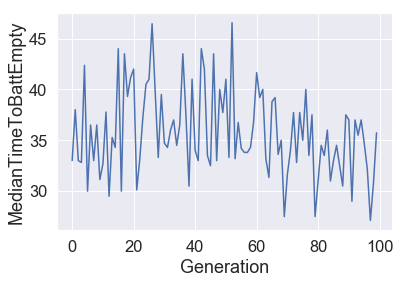

In [9]:
sns.lineplot(x="Generation", y="MedianTimeToBattEmpty", data=fitness_frame)

5000
     Battery    Poison      Food
0   0.102747  0.137438 -0.067737
1   0.164827  0.049688  0.089929
2   0.104894 -0.081514  0.158102
3   0.321923 -0.186377  0.300860
4   0.332161 -0.347615  0.256605
5   0.272621 -0.340678  0.392552
6   0.341561 -0.383585  0.411434
7   0.323485 -0.289167  0.402354
8   0.254439 -0.254220  0.589238
9   0.035392 -0.345099  0.650621
10  0.058762 -0.383125  0.641722
11 -0.093733 -0.217591  0.618019
12  0.005650 -0.196371  0.724329
13  0.020267 -0.345207  0.704028
14  0.022910 -0.278451  0.595067
15  0.177963 -0.249121  0.546819
16  0.194225 -0.177274  0.483502
17  0.306611 -0.245004  0.342272
18  0.197899 -0.177649  0.428674
19  0.201391 -0.211056  0.430746
20  0.251307 -0.191240  0.541165
21  0.084181 -0.164287  0.379286
22  0.032984 -0.252391  0.657051
23  0.090721 -0.254227  0.591489
24  0.233699 -0.286293  0.678555
25  0.331831 -0.277006  0.747562
26  0.382760 -0.279272  0.700195
27  0.540534 -0.300177  0.642493
28  0.652407 -0.288953  0.718719
29  0

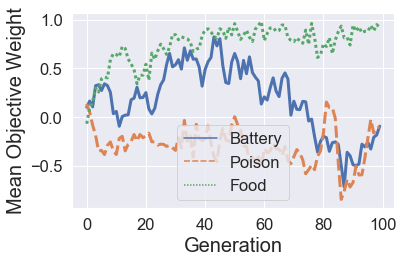

In [3]:
nn_output_file = "../aug2_evo_test_battery_capacity_25/nn_outputs_summary.csv"

import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

#Plotting NN outputs (that is, objective values) over generations.
nn_out_frame = pandas.read_csv(nn_output_file, sep=" ")#, header=0, names=["Ammo", "Health", "Frags"])
#nn_out_frame.rename(columns={"Ammo": "Ammunition",
#                              "Health": "Health",
#                              "Frags": "Attack"}, inplace=True)
#print(nn_out_frame)
print(len(nn_out_frame))
summmary_nn_outputs=summarize_across_generations(nn_out_frame)
#summmary_nn_outputs.drop(summmary_nn_outputs.tail(1).index,inplace=True) # drop last n rows
#print(summmary_nn_outputs)
summmary_nn_outputs=summmary_nn_outputs.drop("Generation",1) #Dropping since is same as index
print(summmary_nn_outputs)
plt.xlabel("Generation", fontsize=20)
plt.ylabel("Mean Objective Weight", fontsize=20)
ax=sns.lineplot(data=summmary_nn_outputs, linewidth = 3)
fig=ax.get_figure()
fig.tight_layout()
fig.savefig("objectives_over_generations.pdf")


## Comparing fitnesses

In [29]:
#Hardcoded rules seems to give significantly higher fitnesses?
shy_fitness = pandas.read_csv(shy_rewards_file, names = ["Defensive"])
shy_fitness2 = pandas.read_csv(shy_rewards_file2, names = ["\nDefensive2"])
all_ones_fitness = pandas.read_csv(all_ones_reward_file, names = ["Aggressive"])


dynamic_manual_rules_fitnesses = pandas.read_csv(manual_obj_rewards_file, names = ["\nHardcoded"])
print(dynamic_manual_rules_fitnesses)

evolved_nn_fitnesses_frame = pandas.read_csv(evolved_objectives_file, names = ["Evolved"])
print(evolved_nn_fitnesses_frame)

    \nHardcoded
0    -38.311111
1    -38.837209
2    -36.765957
3    -25.414634
4    -27.309524
5    -24.268293
6    -23.500000
7    -22.947368
8    -43.021277
9    -39.469388
10   -34.568182
11   -28.674419
12   -40.500000
13   -36.023256
14   -25.307692
15   -33.186047
16   -40.395833
17   -31.390244
18   -35.377778
19   -33.355556
      Evolved
0  -14.358974
1  -12.756757
2  -22.853659
3   -9.222222
4  -12.416667
5  -20.750000
6   -9.828571
7  -12.805556
8  -16.564103
9  -12.459459
10 -12.378378
11 -15.135135
12 -17.243243
13 -20.611111
14 -17.128205
15 -17.513514
16 -11.783784
17  -4.823529
18 -23.650000
19 -22.000000


In [30]:
import scipy.stats as st
print("Shy vs Dynamic: ", st.mannwhitneyu(shy_fitness, dynamic_manual_rules_fitnesses))
print("Shy vs Evolved: ", st.mannwhitneyu(shy_fitness, evolved_nn_fitnesses_frame))
print("Dynamic vs Evolved: ", st.mannwhitneyu(dynamic_manual_rules_fitnesses, evolved_nn_fitnesses_frame))

Shy vs Dynamic:  MannwhitneyuResult(statistic=203.0, pvalue=0.0009862808982328683)
Shy vs Evolved:  MannwhitneyuResult(statistic=225.0, pvalue=0.0029989755444979624)
Dynamic vs Evolved:  MannwhitneyuResult(statistic=2.0, pvalue=4.586386355828241e-08)


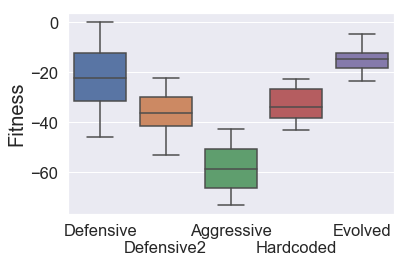

In [31]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
frames = [shy_fitness, shy_fitness2, all_ones_fitness, dynamic_manual_rules_fitnesses, evolved_nn_fitnesses_frame]
#print(evolved_nn_fitnesses_frame)
concatenated = pandas.concat(frames,sort=False)
plot=sns.boxplot(data=concatenated)
fig=plot.get_figure()
plt.ylabel("Fitness", fontsize=20)
fig.tight_layout()
fig.savefig('fitness_no_ammo.pdf', dpi=300)

In [10]:
#Shy has objective [1,1,-1]. Ones has objective [1,1,1].
#Evolved outperforms shy. That's interesting! It must have a different
#behavior, then? YES! A dynamic one!

## Analyzing behavior

In [4]:
import numpy as np
behavior_file = "../aug2_evo_test_battery_capacity_50/nn_behavior_measures_to_objectives.csv"
behavior_frame = pandas.read_csv(behavior_file, sep=" ")
behavior_frame.shape
#behavior_frame.rename(columns={"m_ammo": "Current Ammunition",
#                              "m_health": "Current Health",
#                              "m_frags": "Monsters Killed",
#                              "o_ammo":"Ammunition",
#                              "o_health":"Health",
#                              "o_frags":"Attack"}, inplace=True)
print(behavior_frame)

      m_battery  m_poisons     m_food  o_battery  o_poisons  o_foods  \
0           0.0   0.000000   0.000000        0.0        0.0      1.0   
1           0.0   1.052632   0.000000        0.0        0.0      1.0   
2           0.0   2.105263   0.000000        0.0        0.0      1.0   
3           0.0   3.157895   0.000000        0.0        0.0      1.0   
4           0.0   4.210526   0.000000        0.0        0.0      1.0   
5           0.0   5.263158   0.000000        0.0        0.0      1.0   
6           0.0   6.315789   0.000000        0.0        0.0      1.0   
7           0.0   7.368421   0.000000        0.0        0.0      1.0   
8           0.0   8.421053   0.000000        0.0        0.0      1.0   
9           0.0   9.473684   0.000000        0.0        0.0      1.0   
10          0.0  10.526316   0.000000        0.0        0.0      1.0   
11          0.0  11.578947   0.000000        0.0        0.0      1.0   
12          0.0  12.631579   0.000000        0.0        0.0     

In [5]:
#Method for summarizing and plotting averages for 1 measurement.
def summarize_measurement_and_plot_objectives(dataframe, main_objective):
    meas_to_objectives_array = []
    unique_main_measures = dataframe[main_objective].unique()
    for unique_measure in unique_main_measures:
        #All frames with given value for the column
        sub_frame=dataframe.loc[dataframe[main_objective] == unique_measure]
        objective_means = [sub_frame["o_battery"].mean(), sub_frame["o_poisons"].mean(),sub_frame["o_foods"].mean()]
        meas_to_objectives_array.append([unique_measure,*objective_means])

    meas_to_objectives_array=np.array(meas_to_objectives_array)
    df = pandas.DataFrame(meas_to_objectives_array, columns=[main_objective, 'o_battery', 'o_poisons', 'o_foods'])
    ax=df.plot(x=main_objective, y=['o_battery', 'o_poisons', 'o_foods'], linewidth=5)
    fig=ax.get_figure()
    plt.ylabel("Objective Weight", fontsize=20)
    fig.tight_layout()
    fig.savefig(main_objective.replace(" ","")+".pdf")


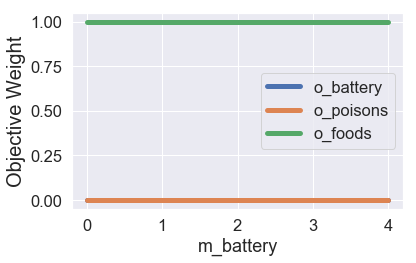

In [6]:
summarize_measurement_and_plot_objectives(behavior_frame, 'm_battery')
#Aha! We learned the rule to seek foods always, except when food is empty (beginning of game).
#Probably to ensure we get some battery early on?

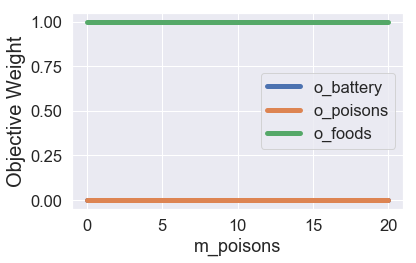

In [7]:
summarize_measurement_and_plot_objectives(behavior_frame, 'm_poisons')

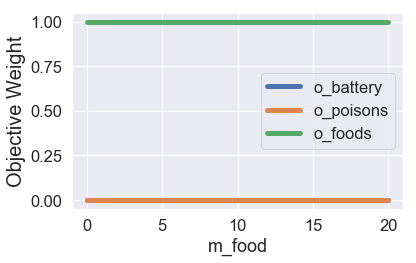

In [8]:
summarize_measurement_and_plot_objectives(behavior_frame, 'm_food')


In [ ]:
#Learns to seek battery as long as having eaten few foods. Probably a "hack" to seek batteries early,
#Then stop that later when it has enough battery anyway.
#KOE: Runime was fast! 2 hours total, but converged after 30 min, probably.